In [1]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
import numpy as np
import os
from img_manager import *

0


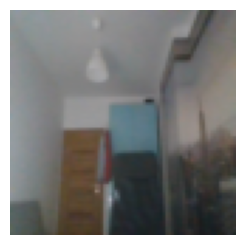

1


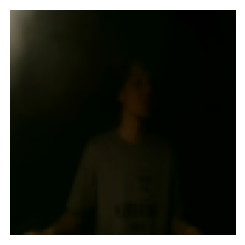

In [6]:
DIR = 'img/test/'
images, labels = load_data(DIR)

LEN = 2
for i in range(LEN):
    print(labels[i*4])
    plt.subplot(1,LEN,i+1)
    plt.axis('off')
    plt.imshow(images[i*4])
    plt.show()

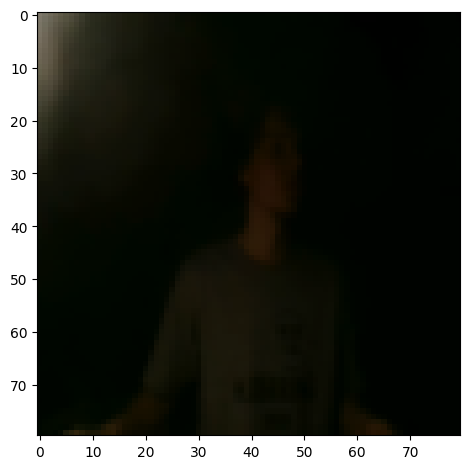

In [4]:
imshow(images[6])